In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

### 1. 预备函数

##### 1.1 坐标转换、角度转换与计算的单元函数

In [3]:
# 角度制换算到弧度制
def angle_to_radian(x):
    return x/360*2*np.pi

# 极坐标转化为直角坐标
def polar_to_descartes(r, ang):
    rad = angle_to_radian(ang)
    x = r*math.cos(rad)
    y = r*math.sin(rad)
    return x, y

# 计算出两个向量，分别对应于由第一个输入点分别指向后两个输入点
def get_vectors(x, y, z):
    v1 = np.array([y[0]-x[0], y[1]-x[1]])
    v2 = np.array([z[0]-x[0], z[1]-x[1]])
    return v1, v2
# 计算两向量间的弧度制夹角
def radian_between_vectors(x, y):
    Lx = np.sqrt(x.dot(x))
    Ly = np.sqrt(y.dot(y))
    cos_value = x.dot(y)/(Lx*Ly)
    rad=np.arccos(cos_value) #radian
    return rad

#获得由第一个输入点分别指向后两个输入点的两射线间的弧度制夹角
def get_alpha(x, y, z):
    v1, v2 = get_vectors(x, y, z)
    return radian_between_vectors(v1, v2)


##### 1.2 上下轨迹圆计算与选取函数

In [4]:
# 基于论文6.2.2.1部分推导出的公式，基于两点及张角α，计算出圆心偏下的轨迹圆圆心坐标与半径的平方
def get_low_circle_orbit(p, q, alpha):
    x_o = (p[0]+q[0] + (p[1]-q[1])*math.cos(alpha)/math.sin(alpha))/2
    y_o = (p[1]+q[1] - (p[0]-q[0])*math.cos(alpha)/math.sin(alpha))/2
    r_square = ((p[0]-q[0])**2 + (p[1]-q[1])**2)/4/math.sin(alpha)/math.sin(alpha)
    o = (x_o, y_o)
    return o, r_square

# 同基于论文6.2.2.1部分推导出的公式，基于两点及张角α，计算出圆心偏上的轨迹圆圆心坐标与半径的平方
def get_high_circle_orbit(p, q, alpha):
    x_o = (p[0]+q[0] - (p[1]-q[1])*math.cos(alpha)/math.sin(alpha))/2
    y_o = (p[1]+q[1] + (p[0]-q[0])*math.cos(alpha)/math.sin(alpha))/2
    r_square = ((p[0]-q[0])**2 + (p[1]-q[1])**2)/4/math.sin(alpha)/math.sin(alpha)
    o = (x_o, y_o)
    return o, r_square

# 由已知点x位于实际轨迹圆上，在圆心偏下的轨迹圆和圆心偏上的轨迹圆中选出实际的轨迹圆，返回其半径和圆心的横纵坐标
def get_single_circle(x, p, q, alpha):
    o1, r_square = get_low_circle_orbit(p, q, alpha)
    o2, r_square = get_high_circle_orbit(p, q, alpha)
    
    d1_square = ((x[0]-o1[0])**2)+((x[1]-o1[1])**2)
    d2_square = ((x[0]-o2[0])**2)+((x[1]-o2[1])**2)

    k1 = math.fabs(d1_square - r_square)
    k2 = math.fabs(d2_square - r_square)
    r = math.sqrt(r_square)
    if k1<k2:
        return r, o1[0], o1[1]
    else:
        return r, o2[0], o2[1]

##### 1.3 求两圆非原点交点函数

In [5]:
# 输入两圆圆心p1,p2及相应的半径r1,r2,返回非原点的一个交点坐标，为第一题第二问中求三圆交点做准备
def insection_of_circles(p1,r1,p2,r2):
    d = math.sqrt((abs(p2[0]-p1[0]))**2 + (abs(p2[1]-p1[1]))**2)
    if d > (r1+r2) or d < (abs(r1-r2)):
        # print ("两圆不相交")
        return 
    elif d == 0 and r1 == r2 :
        # print ("两圆圆心相同")
        return
    else:
        A = (r1**2 - r2**2 + d**2) / (2 * d)
        if r1**2 - A**2<0:
            return 
        h = math.sqrt(r1**2 - A**2)
        x2 = p1[0] + A * (p2[0]-p1[0])/d
        y2 = p1[1] + A * (p2[1]-p1[1])/d
        x3 = round(x2 - h * (p2[1] - p1[1]) / d,8)
        y3 = round(y2 + h * (p2[0] - p1[0]) / d,8)
        if x3 != y3:
            return [x3, y3]
        x4 = round(x2 + h * (p2[1] - p1[1]) / d,8)
        y4 = round(y2 - h * (p2[0] - p1[0]) / d,8)
        return [x4, y4]

##### 1.4 绘图函数

In [6]:
# 在已创建的图层上绘制给定半径和圆心位置的'圆'
# def draw_circle(r=100, o_x=0, o_y=0, color="blue", linewidth=2):
#     theta = np.linspace(0, 2 * np.pi, 200)
#     x =o_x + r * np.cos(theta)
#     y =o_y + r * np.sin(theta)
#     ax.plot(x, y, color=color, linewidth=linewidth)
#     ax.axis("equal")

# # 在已创建的图层上绘制给定'点'
# def plot(x, color='red',linestyle='.'):
#     ax.plot(x[0], x[1], color,linestyle)
    
# # 在已创建的图层上绘制给定'点列'
# def plot_list(l, color='red', linestyle='.'):
#     for item in l:
#         plot(item,color = color)  
#     plt.show()

In [7]:
# 创建ndarray类型，保存直角坐标系下第一题中圆形编队各位点的理想坐标，索引与无人机编号相对应

fy_right = [np.array([0, 0])]
for i in range(9):
    fy_right.append(np.array(polar_to_descartes(100, 40*i)))
fy_right = np.array(fy_right)

### 2. 问题1第(2)问算法实现

##### 2.1 假设仅多一架未知编号的无人机发射信号，证明此时无法有效定位

In [8]:
# 随机生成待调整无人机编号,基于标准正态分布随机分配其位置;整个图的等比例放大缩小不会影响角度，我们假设编队半径为100m
m = np.random.randint(2,10)
delta_x = np.random.standard_normal(1)[0]
delta_y = np.random.standard_normal(1)[0]
m_position = np.array([fy_right[m][0]+delta_x, fy_right[m][1]+delta_y])

# 计算FY00，FY01与生成的待调整无人机之间的张角α1大小与轨迹圆
alpha1 = get_alpha(m_position, fy_right[0], fy_right[1])
r1, o1_x, o1_y = get_single_circle(m_position, fy_right[0], fy_right[1], alpha1)
o1 = np.array([o1_x, o1_y])

# 随机为未知编号的发射信号无人机指定编号为i_real,便于接下来的讨论
i_real = np.random.randint(2,10)
while(i_real == m):
    i_real = np.random.randint(2,10)
alpha2 = get_alpha(m_position, fy_right[0], fy_right[i_real])
alpha3 = get_alpha(m_position, fy_right[1], fy_right[i_real])

# 接收信号的无人机基于所接收到的三个α角，遍历假设未知编号的发射信号无人机的所有可行编号，
# 分别计算出两个新圆2，3；并求圆1与圆2、3分别的交点；若三圆共交于一点，将该点添加到结果列表A中
A = []
for i in range(2, 10):
    if i == m:
        continue
    r2, o2_x, o2_y = get_single_circle(fy_right[m], fy_right[0], fy_right[i], alpha2) 
    o2 = np.array([o2_x, o2_y])
    r3, o3_x, o3_y = get_single_circle(fy_right[m], fy_right[1], fy_right[i], alpha3) 
    o3 = np.array([o3_x, o3_y])
        
    insec_12 = insection_of_circles(o1, r1, o2, r2)
    insec_13 = insection_of_circles(o1, r1, o3, r3)
    
    if (insec_12 is not None) and (insec_13 is not None):
        if math.fabs(insec_12[0]-insec_13[0])<1e-1 and math.fabs(insec_12[1]-insec_13[1])<1e-1 and insec_12[0]!=100 and math.fabs(insec_12[0]-0)>1:
            A.append(insec_12) 
                   
print('待调整无人机为FY0{},位置为{};\n未知编号的无人机实际为FY0{},\n此时,得到的可行三圆交点为{}'.format(m, m_position, i_real, A))
if A==[]:
    print("无有效交点,无法定位")
if len(A)>=2:
    print("输出多个交点,无法有效定位")

待调整无人机为FY03,位置为[16.5564826  97.20042601];
未知编号的无人机实际为FY06,
此时,得到的可行三圆交点为[]
无有效交点,无法定位


##### 2.2 多两架未知编号的无人机发射信号，任意情况下均可实现有效定位

In [9]:
# 随机生成待调整无人机编号及位置
m = np.random.randint(2,10)
delta_x = np.random.standard_normal(1)[0]
delta_y = np.random.standard_normal(1)[0]
m_position = np.array([fy_right[m][0]+delta_x, fy_right[m][1]+delta_y])

# 计算FY00，FY01与生成的待调整无人机之间的张角α1大小与轨迹圆
alpha1 = get_alpha(m_position, fy_right[0], fy_right[1])
r1, o1_x, o1_y = get_single_circle(m_position, fy_right[0], fy_right[1], alpha1)
o1 = np.array([o1_x, o1_y])

# 随机为未知编号的第一架发射信号无人机指定编号为i_real
i_real = np.random.randint(2,10)
while(i_real == m):
    i_real = np.random.randint(2,10)
alpha2 = get_alpha(m_position, fy_right[0], fy_right[i_real])

# 随机为未知编号的第二架发射信号无人机指定编号为j_real
j_real = np.random.randint(2,10)
while(j_real == m or j_real == i_real):
    j_real = np.random.randint(2,10)
alpha3 = get_alpha(m_position, fy_right[0], fy_right[j_real])

# 接收信号的无人机基于所接收到的三个α角，二重循环遍历所有未知编号的两架发射信号无人机的所有可行编号组合
# 基于此分别计算出两个新圆2，3；并求圆1与圆2、3分别的交点；若三圆共交于一点，将该点添加到结果列表A中
A = []
for i in range(2, 10):
    if i == m:
        continue
    for j in range(2, 10):
        if j == m or j == i:
            continue
        r2, o2_x, o2_y = get_single_circle(fy_right[m], fy_right[0], fy_right[i], alpha2) 
        o2 = np.array([o2_x, o2_y])
        r3, o3_x, o3_y = get_single_circle(fy_right[m], fy_right[0], fy_right[j], alpha3) 
        o3 = np.array([o3_x, o3_y])
        insec_12 = insection_of_circles(o1, r1, o2, r2)
        insec_13 = insection_of_circles(o1, r1, o3, r3)
       
        if (insec_12 is not None) and (insec_13 is not None):
            if math.fabs(insec_12[0]-insec_13[0])<1e-6 and math.fabs(insec_12[1]-insec_13[1])<1e-6 and insec_12[0]!=100 and math.fabs(insec_12[0]-0)>1:
                A.append(insec_12)     
                   
print('待调整无人机为FY0{},位置为{};\n未知编号的两架无人机实际为FY0{}和FY0{},\n此时,得到的可行三圆交点为{},实现了有效定位'.format(m, m_position, i_real, j_real, A))

待调整无人机为FY07,位置为[-51.1624726  -87.24025972];
未知编号的两架无人机实际为FY05和FY03,
此时,得到的可行三圆交点为[[-51.1624726, -87.24025972]],实现了有效定位


### 3. 问题1第(3)问调整方案的算法实现

In [761]:
# 第三问中实际的各无人机坐标的初始化,保存到ndarray中,索引与无人机编号相对应
fy00 = np.array([0, 0])
fy01 = np.array([100, 0])
fy02 = np.array(polar_to_descartes(98, 40.10))
fy03 = np.array(polar_to_descartes(112, 80.21))
fy04 = np.array(polar_to_descartes(105, 119.75))
fy05 = np.array(polar_to_descartes(98, 159.86))
fy06 = np.array(polar_to_descartes(112, 199.96))
fy07 = np.array(polar_to_descartes(105, 240.07))
fy08 = np.array(polar_to_descartes(98, 280.17))
fy09 = np.array(polar_to_descartes(112, 320.28))
fy = np.array([fy00, fy01, fy02, fy03, fy04, fy05, fy06, fy07, fy08, fy09])


##### 3.1 基于前述单元函数，实现获取高维数据的函数

In [762]:
# 第1个变量为待调整无人机编号 第2、3、4个变量为除FY00外发射信号的无人机编号，分别计算待调整无人机与FY00，输入编号的无人机的张角，输出三个α构成的array
def get_alphas(x, a, b, c):
    x = fy[x]
    o = fy[0]
    a = fy[a]
    b = fy[b]
    c = fy[c]
    alpha1 = get_alpha(x, o, a)
    alpha2 = get_alpha(x, o, b)
    alpha3 = get_alpha(x, o, c)
    alpha = np.array([alpha1, alpha2, alpha3])
    return alpha

# 输入各发射信号的无人机编号，以ndarray的形式返回它们分别的理想点位构成的矩阵
def get_ideal_positions(a, b, c):
    a = fy_right[a]
    b = fy_right[b]
    c = fy_right[c]
    return np.array([a, b, c])

# 输入各发射信号的无人机编号，以ndarray的形式返回它们分别的真实位置构成的矩阵
def get_real_positions(a, b, c):
    a = fy[a]
    b = fy[b]
    c = fy[c]
    return np.array([a, b, c])

#输入待调整无人机编号，除FY00外发射信号的各无人机编号，以ndarray的形式返回与角度向量顺序一致的三个圆分别的[半径平方，圆心横坐标，圆心纵坐标]构成的矩阵
def get_circles(x, a, b, c):
    o = fy[0]
    alpha = get_alphas(x, a, b, c)
    ideal_position = get_ideal_positions(a, b, c)
    circle1 = get_single_circle(fy_right[x], o, ideal_position[0], alpha[0])
    circle2 = get_single_circle(fy_right[x], o, ideal_position[1], alpha[1])
    circle3 = get_single_circle(fy_right[x], o, ideal_position[2], alpha[2])
    return np.array([circle1, circle2, circle3])

##### 3.2 基于论文7.2部分的Taylor算法模型构建调整函数,进而采取"直径"选点策略实现迭代位置调整

In [763]:
iter_times=10
errors = np.zeros((iter_times * 5, 10))
error_2=np.zeros((iter_times*4,2))
def circle_adjust(k):
    global errors
    for i in range(2, 6):
        mov = np.zeros((10, 2))
        for j in range(2, 10):
            if j == i or j == i + 4:
                continue
            # 获得三个alpha
            alpha = get_alphas(j, 1, i, i + 4)
            # 获得三组圆
            circles = get_circles(j, 1, i, i + 4)
            circles_r = circles[:, 0]
            circles_xy = circles[:, 1:]
            
            r_ideal = np.sqrt(np.sum((circles_xy - fy_right[j]) ** 2, axis=1))
            H = -(circles_xy - fy_right[j]) / r_ideal.reshape((-1, 1))

            ans = np.linalg.inv(H.T @ H) @ H.T @ (circles_r - r_ideal)
            mov[j] = ans
            print("FY{},{}发射信号,FY{}计算得到其位移为{}".format(i, i + 4, j, mov[j]))
        global fy
        fy -= mov
        print("第{}圈调整后".format(4 * k + i - 2))
        for l in range(10):
            print("FY{}的位置偏差为：".format(l), fy_right[l][0] - fy[l][0], fy_right[l][1] - fy[l][1])
        errors[4 * k + i - 2,:] = np.sqrt(np.sum((fy_right - fy)** 2, axis=1))
        error_2[4 * k + i - 2,:]=(fy_right[2] - fy[2])
        
for i in range(iter_times):
    circle_adjust(i)

FY2,6发射信号,FY3计算得到其位移为[-3.47970425 11.67487079]
FY2,6发射信号,FY4计算得到其位移为[-4.17778114 -3.18223718]
FY2,6发射信号,FY5计算得到其位移为[ 8.25135485 -6.40981219]
FY2,6发射信号,FY7计算得到其位移为[-0.82033632  5.32440238]
FY2,6发射信号,FY8计算得到其位移为[-6.25578723  6.41178495]
FY2,6发射信号,FY9计算得到其位移为[  4.60784248 -10.6609085 ]
第0圈调整后
FY0的位置偏差为： 0.0 0.0
FY1的位置偏差为： 0.0 0.0
FY2的位置偏差为： 1.6421470218915033 1.154645252038037
FY3的位置偏差为： -5.159087657327415 -0.2133640614707133
FY4的位置偏差为： -2.0750482533084877 -7.740572323897979
FY5的位置偏差为： 6.2897949156994315 -5.950689637668063
FY6的位置偏差为： 11.303028611240634 4.030757119626088
FY7的位置偏差为： 1.5685293149644153 9.718602366610156
FY8的位置偏差为： -6.194769920994993 4.3912527047477425
FY9的位置偏差为： -4.935485252264911 -3.3675983003564127
FY3,7发射信号,FY2计算得到其位移为[-1.4432676  -4.24965475]
FY3,7发射信号,FY4计算得到其位移为[1.23121727 7.01324616]
FY3,7发射信号,FY5计算得到其位移为[-5.50074926  2.46790295]
FY3,7发射信号,FY6计算得到其位移为[-5.49478538 -5.36824077]
FY3,7发射信号,FY8计算得到其位移为[3.90290074 2.14565069]
FY3,7发射信号,FY9计算得到其位移为[-0.98099951  4.75109106]
第

##### 3.3 绘制迭代过程中的误差变化图

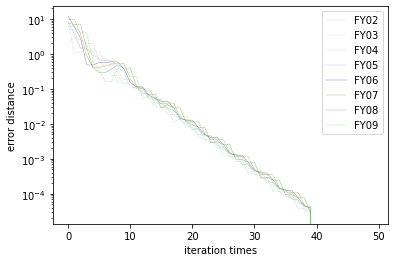

In [764]:
plt.figure()
for i in range(2, 10):
    plt.yscale('log')
    plt.plot(errors[:, i],linewidth=0.3,color=(np.random.uniform(),np.random.uniform(),np.random.uniform()),label="FY0{}".format(i))

plt.legend()
plt.xlabel('iteration times')
plt.ylabel('error distance')
plt.savefig("all_errors.png")

### 4. 第二题 锥形编队调整方案的算法实现

In [765]:
# 第二题中实际的各无人机坐标的初始化,保存到ndarray中,(索引＋1)与无人机编号对应
fy13 = np.array([0, 0])
fy12 = np.array([0, 50])
fy11 = np.array([0, 100])
fy14 = np.array([0, -50])
fy15 = np.array([0, -100])
fy08 = np.array([50*math.sin(math.pi/3), 25])
fy07 = np.array([50*math.sin(math.pi/3), 75])
fy09 = np.array([50*math.sin(math.pi/3), -25])
fy10 = np.array([50*math.sin(math.pi/3), -75])
fy05 = np.array([2*50*math.sin(math.pi/3), 0])
fy04 = np.array([2*50*math.sin(math.pi/3), 50])
fy06 = np.array([2*50*math.sin(math.pi/3), -50])
fy02 = np.array([3*50*math.sin(math.pi/3), 25])
fy03 = np.array([3*50*math.sin(math.pi/3), -25])
fy01 = np.array([4*50*math.sin(math.pi/3), 0])

fy_cone_right = np.array([fy01,fy02,fy03,fy04,fy05,fy06,fy07,fy08,fy09,fy10,fy11,fy12,fy13,fy14,fy15])

In [766]:
# 基于计算得到合理标准差的正态分布，随机初始化第二题中实际的各无人机坐标,保存到ndarray中,(索引＋1)与无人机编号对应
fy_cone = np.array([fy01,fy02,fy03,fy04,fy05,fy06,fy07,fy08,fy09,fy10,fy11,fy12,fy13,fy14,fy15])
fy_cone[0] = fy_cone_right[0]
fy_cone[14] = fy_cone_right[14]

std_variance=4

for i in range(1, 14):
    delta_x = np.random.standard_normal(1)[0]*std_variance
    delta_y = np.random.standard_normal(1)[0]*std_variance
    fy_cone[i] = np.array([fy_cone_right[i][0]+delta_x, fy_cone_right[i][1]+delta_y])

##### 4.1 基于前述单元函数，实现获取高维数据的函数

In [767]:
# 第1个变量为待调整无人机编号,第2、3、4个变量为发射信号的无人机编号，即为a,b,c;
# 分别计算待调整无人机与a,b;a,c;b,c三组发射信号的无人机的张角，输出三个α构成的array
def get_cone_alphas(x, a, b, c):
    x = fy_cone[x-1]
    a = fy_cone[a-1]
    b = fy_cone[b-1]
    c = fy_cone[c-1]
    alpha1 = get_alpha(x, a, b)
    alpha2 = get_alpha(x, a, c)
    alpha3 = get_alpha(x, b, c)
    alpha = np.array([alpha1, alpha2, alpha3])
    return alpha

# 输入各发射信号的无人机编号，以ndarray的形式返回它们分别的理想点位构成的矩阵
def get_cone_ideal_positions(a, b, c):
    a = fy_cone_right[a-1]
    b = fy_cone_right[b-1]
    c = fy_cone_right[c-1]
    return np.array([a, b, c])

# 输入各发射信号的无人机编号，以ndarray的形式返回它们分别的真实位置构成的矩阵
def get_cone_real_positions(a, b, c):
    a = fy_cone[a-1]
    b = fy_cone[b-1]
    c = fy_cone[c-1]
    return np.array([a, b, c])

#输入待调整无人机编号，发射信号的各无人机编号，以ndarray的形式返回与角度向量顺序一致的三个圆分别的[半径平方，圆心横坐标，圆心纵坐标]构成的矩阵
def get_cone_circles(x, a, b, c):
    alpha = get_cone_alphas(x, a, b, c)
    ideal_position = get_cone_ideal_positions(a, b, c)
    circle1 = get_single_circle(fy_cone_right[x-1], ideal_position[0], ideal_position[1], alpha[0])
    circle2 = get_single_circle(fy_cone_right[x-1], ideal_position[0], ideal_position[2], alpha[1])
    circle3 = get_single_circle(fy_cone_right[x-1], ideal_position[1], ideal_position[2], alpha[2])
    return np.array([circle1, circle2, circle3])

##### 4.2 Taylor算法模型构建调整函数,进而采取合理的选点策略实现迭代位置调整

In [768]:
iter_time2=100
cone_errors=np.zeros((iter_time2*2,15))

fy_senders = np.array([[1,11,15],[5,8,9]])
def cone_adjust(k):
    global fy_cone
    for i in range(2):
        fy_sender = fy_senders[i]
        mov=np.zeros((15,2))
        for j in range(2, 15):
            if j in fy_sender:
                continue
            # 获得三个alpha
            alpha = get_cone_alphas(j, fy_sender[0], fy_sender[1], fy_sender[2])
            # 获得三组圆
            circles = get_cone_circles(j, fy_sender[0], fy_sender[1], fy_sender[2])
            circles=circles[circles[:,0]<500]
            circles_r = circles[:, 0]
            circles_xy = circles[:, 1:]
            
            r_ideal = np.sqrt(np.sum((circles_xy - fy_cone_right[j-1]) ** 2, axis=1))
            H = -(circles_xy - fy_cone_right[j - 1]) / r_ideal.reshape((-1, 1))
            ans = np.linalg.inv(H.T @ H) @ H.T @ (circles_r - r_ideal)
            mov[j-1] = ans
            print("FY{}发射信号,FY{}计算得到其位移为{}".format(fy_sender, j, -mov[j-1]))
        fy_cone-=mov
        print("第{}圈调整后".format(3 * k + i))
        for l in range(15):
            print("FY{}的位置偏差为：".format(l+1), fy_cone_right[l][0] - fy_cone[l][0], fy_cone_right[l][1] - fy_cone[l][1])
        cone_errors[2*k+i,:]=np.sqrt(np.sum((fy_cone_right-fy_cone)**2,axis=1))
            
for i in range(100):
    cone_adjust(i)

FY[ 1 11 15]发射信号,FY2计算得到其位移为[1.1888361  5.96731654]
FY[ 1 11 15]发射信号,FY3计算得到其位移为[-0.68019963  0.59913311]
FY[ 1 11 15]发射信号,FY4计算得到其位移为[5.56118649 0.71196675]
FY[ 1 11 15]发射信号,FY5计算得到其位移为[-1.47971611  7.24054823]
FY[ 1 11 15]发射信号,FY6计算得到其位移为[-5.68107425 -7.5303945 ]
FY[ 1 11 15]发射信号,FY7计算得到其位移为[ 5.14938898 -1.93227712]
FY[ 1 11 15]发射信号,FY8计算得到其位移为[10.79839946 -2.13365465]
FY[ 1 11 15]发射信号,FY9计算得到其位移为[3.78004948 3.67272552]
FY[ 1 11 15]发射信号,FY10计算得到其位移为[ 1.01218502 -1.31173223]
FY[ 1 11 15]发射信号,FY12计算得到其位移为[5.90190083 6.04541438]
FY[ 1 11 15]发射信号,FY13计算得到其位移为[1.52479964 5.14956933]
FY[ 1 11 15]发射信号,FY14计算得到其位移为[-0.34993781 13.22669404]
第0圈调整后
FY1的位置偏差为： 0.0 0.0
FY2的位置偏差为： -4.374448632454403 0.8953567835240221
FY3的位置偏差为： -1.6144194843208197 7.96484652537648
FY4的位置偏差为： -4.714835909533036 -0.01511037834890061
FY5的位置偏差为： -3.992014356759526 -1.58677641619198
FY6的位置偏差为： 5.9877099314702065 12.367930672804675
FY7的位置偏差为： -4.730981540160222 -1.333245788557619
FY8的位置偏差为： -4.476265803271573 -2.72206

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11192\1363166023.py:22: RuntimeWarning: invalid value encountered in arccos
  rad=np.arccos(cos_value) #radian


FY[ 1 11 15]发射信号,FY7计算得到其位移为[-4.56334978e-06 -1.32170026e-04]
FY[ 1 11 15]发射信号,FY8计算得到其位移为[-6.66595226e-05 -3.84854354e-05]
FY[ 1 11 15]发射信号,FY9计算得到其位移为[-5.71411123e-05 -4.94852767e-05]
FY[ 1 11 15]发射信号,FY10计算得到其位移为[0.0001315  0.00012828]
FY[ 1 11 15]发射信号,FY12计算得到其位移为[-1.16790092e-04  6.22257723e-05]
FY[ 1 11 15]发射信号,FY13计算得到其位移为[2.49429898e-05 2.78817022e-04]
FY[ 1 11 15]发射信号,FY14计算得到其位移为[-2.38008324e-05  6.09056691e-05]
第126圈调整后
FY1的位置偏差为： 0.0 0.0
FY2的位置偏差为： -0.0003581958633560589 0.00010340299307287637
FY3的位置偏差为： -0.0003582161714348331 -0.00020681608263828366
FY4的位置偏差为： -0.0007300439197592823 1.629928192414809e-09
FY5的位置偏差为： -0.00026866773582412407 -9.306873168993673e-05
FY6的位置偏差为： -0.0003944505475033111 -0.00020682833483220975
FY7的位置偏差为： -0.0003581965980075097 -0.00010340150450360852
FY8的位置偏差为： -0.00025076635789389456 -0.00014477926400147112
FY9的位置偏差为： -0.0002149508668622957 -0.00018615228358598301
FY10的位置偏差为： -0.00035825830062208297 -0.00020684040595142505
FY11的位置偏差为： -0.000358278

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11192\1864125143.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  x_o = (p[0]+q[0] + (p[1]-q[1])*math.cos(alpha)/math.sin(alpha))/2
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11192\1864125143.py:4: RuntimeWarning: invalid value encountered in double_scalars
  y_o = (p[1]+q[1] - (p[0]-q[0])*math.cos(alpha)/math.sin(alpha))/2
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11192\1864125143.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  r_square = ((p[0]-q[0])**2 + (p[1]-q[1])**2)/4/math.sin(alpha)/math.sin(alpha)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11192\1864125143.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  x_o = (p[0]+q[0] - (p[1]-q[1])*math.cos(alpha)/math.sin(alpha))/2
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11192\1864125143.py:12: RuntimeWarning: invalid value encountered in double_scalars
  y_o = (p[1]+q[1] + (p[0]-q[0])*math.cos(alpha)/math.sin(alpha))/2
C:

FY[5 8 9]发射信号,FY14计算得到其位移为[-2.42284880e-12 -1.40824909e-06]
第184圈调整后
FY1的位置偏差为： 0.0 0.0
FY2的位置偏差为： -2.8456612710670015e-06 4.694126616300309e-07
FY3的位置偏差为： -1.6260867141681956e-06 -1.4082355974665006e-06
FY4的位置偏差为： -4.268486122782633e-06 -1.0561791299323886e-06
FY5的位置偏差为： -3.048921215054179e-06 -1.0561772263067266e-06
FY6的位置偏差为： -3.4554444567902465e-06 -1.99500897224425e-06
FY7的位置偏差为： -3.252183439883538e-06 -2.1123459248428844e-06
FY8的位置偏差为： -2.845662692152473e-06 -1.6429440066190182e-06
FY9的位置偏差为： -2.4391419302105533e-06 -2.1123587856664017e-06
FY10的位置偏差为： -2.0326212464283344e-06 -7.04123166883619e-07
FY11的位置偏差为： -3.2115415242023277e-06 -1.8541658732829092e-06
FY12的位置偏差为： -3.455458051553644e-06 -1.760293919517153e-06
FY13的位置偏差为： -3.0489278058225966e-06 -3.168542184374457e-06
FY14的位置偏差为： -1.0163088325691362e-06 -2.6991235699824756e-06
FY15的位置偏差为： 0.0 0.0
FY[ 1 11 15]发射信号,FY2计算得到其位移为[ 3.65864302e-07 -4.57674989e-07]
FY[ 1 11 15]发射信号,FY3计算得到其位移为[1.58544280e-06 4.45941805e-07]
FY[ 1 11 15

##### 4.3 绘制迭代过程中的误差变化图

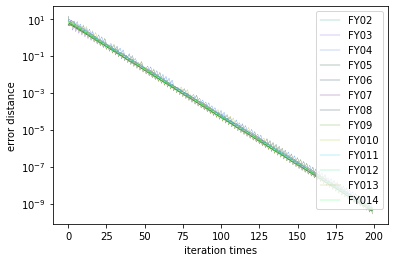

In [769]:
plt.figure()
for i in range(1, 14):
    plt.yscale('log')
    plt.plot(cone_errors[:, i],linewidth=0.3,color=(np.random.uniform(),np.random.uniform(),np.random.uniform()),label="FY0{}".format(i+1))
plt.legend()
plt.xlabel('iteration times')
plt.ylabel('error distance')
plt.savefig("all_errors_p2.png")